In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2020-12-19T17:00:00,6,Friuli Venezia Giulia,594,55,649,12831,13480,-271,974,...,9.0,10096.0,4865.0,-260.0,8.47,4.81,9.65,20.02,-6.78,-1.97
299,2020-12-20T17:00:00,6,Friuli Venezia Giulia,602,55,657,12605,13262,-218,658,...,21.0,6148.0,1868.0,-226.0,8.37,4.95,10.70,35.22,0.00,-1.62
300,2020-12-21T17:00:00,6,Friuli Venezia Giulia,607,56,663,12584,13247,-15,244,...,15.0,2358.0,822.0,-21.0,8.45,5.00,10.35,29.68,1.82,-0.11
301,2020-12-22T17:00:00,6,Friuli Venezia Giulia,598,57,655,12561,13216,-31,549,...,33.0,7407.0,1897.0,-23.0,8.70,4.96,7.41,28.94,1.79,-0.23


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 512
Nuovi tamponi: 6648.0
Percentuale nuovi positivi/nuovi tamponi: 7.7 %
Nuovi guariti: 819.0
Nuovi deceduti: 22.0
Variazione positivi ricoverati con sintomi: -3.0
Variazione positivi in terapia intensiva: -1.0
Variazione positivi in isolamento dimiciliare: -937.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-24T17:00:00,6,Friuli Venezia Giulia,100,16,116,2660,2776,299,412,...,3.0,6521.0,2011.0,290.0,13.79,4.18,6.32,20.49,-15.79,12.07
1,2020-10-25T17:00:00,6,Friuli Venezia Giulia,112,23,135,2892,3027,251,334,...,2.0,3800.0,1471.0,232.0,17.04,4.46,8.79,22.71,43.75,9.04
2,2020-10-26T17:00:00,6,Friuli Venezia Giulia,119,27,146,3139,3285,258,334,...,3.0,3087.0,1093.0,247.0,18.49,4.44,10.82,30.56,17.39,8.52
3,2020-10-27T17:00:00,6,Friuli Venezia Giulia,139,31,170,3275,3445,160,241,...,1.0,4422.0,1507.0,136.0,18.24,4.93,5.45,15.99,14.81,4.87
4,2020-10-28T17:00:00,6,Friuli Venezia Giulia,146,35,181,3551,3732,287,406,...,4.0,5573.0,1705.0,276.0,19.34,4.85,7.29,23.81,12.90,8.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-19T17:00:00,6,Friuli Venezia Giulia,594,55,649,12831,13480,-271,974,...,9.0,10096.0,4865.0,-260.0,8.47,4.81,9.65,20.02,-6.78,-1.97
57,2020-12-20T17:00:00,6,Friuli Venezia Giulia,602,55,657,12605,13262,-218,658,...,21.0,6148.0,1868.0,-226.0,8.37,4.95,10.70,35.22,0.00,-1.62
58,2020-12-21T17:00:00,6,Friuli Venezia Giulia,607,56,663,12584,13247,-15,244,...,15.0,2358.0,822.0,-21.0,8.45,5.00,10.35,29.68,1.82,-0.11
59,2020-12-22T17:00:00,6,Friuli Venezia Giulia,598,57,655,12561,13216,-31,549,...,33.0,7407.0,1897.0,-23.0,8.70,4.96,7.41,28.94,1.79,-0.23


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

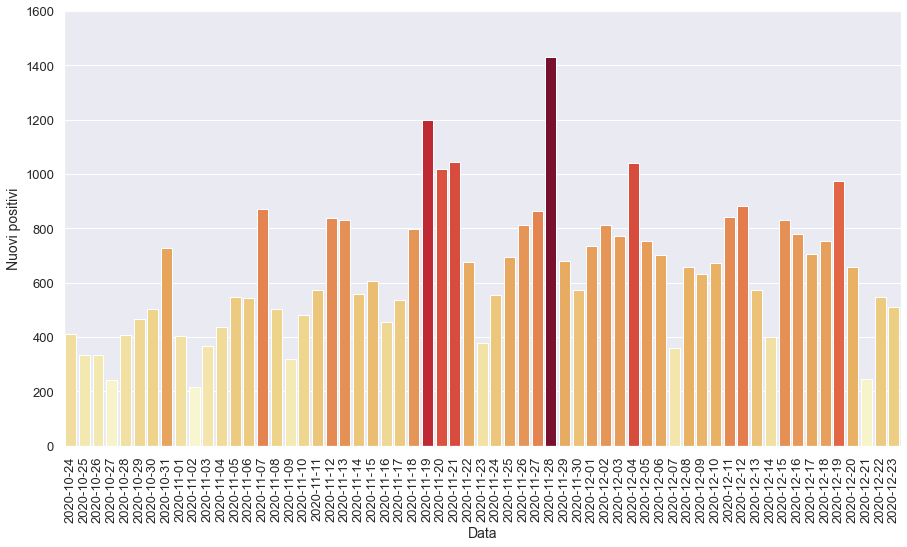

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

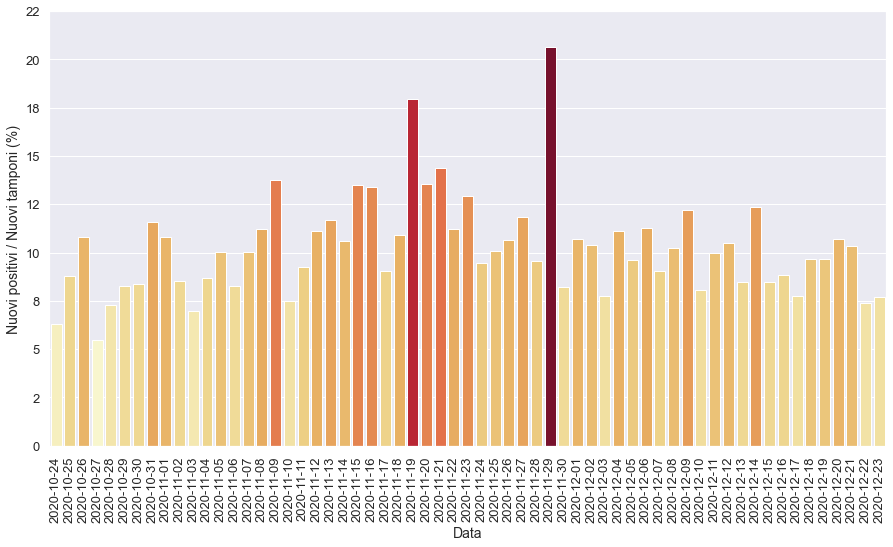

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

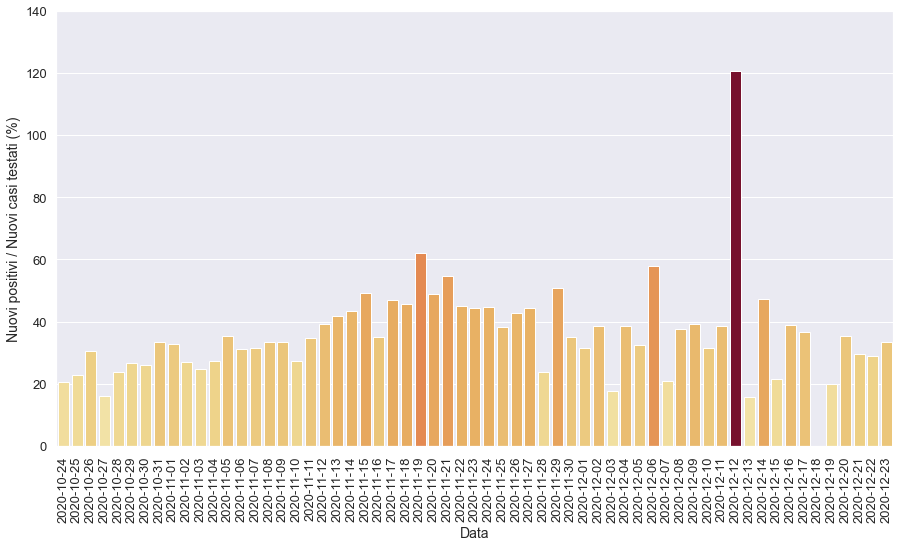

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

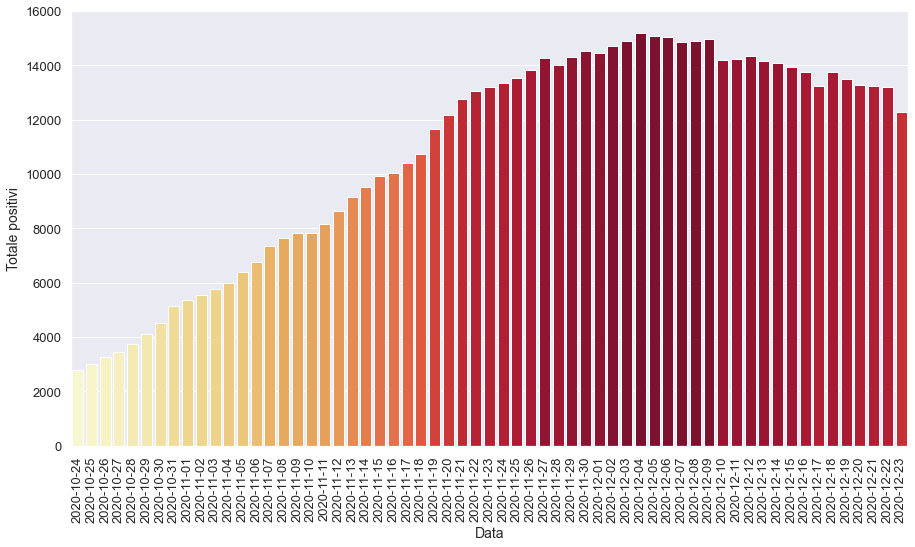

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

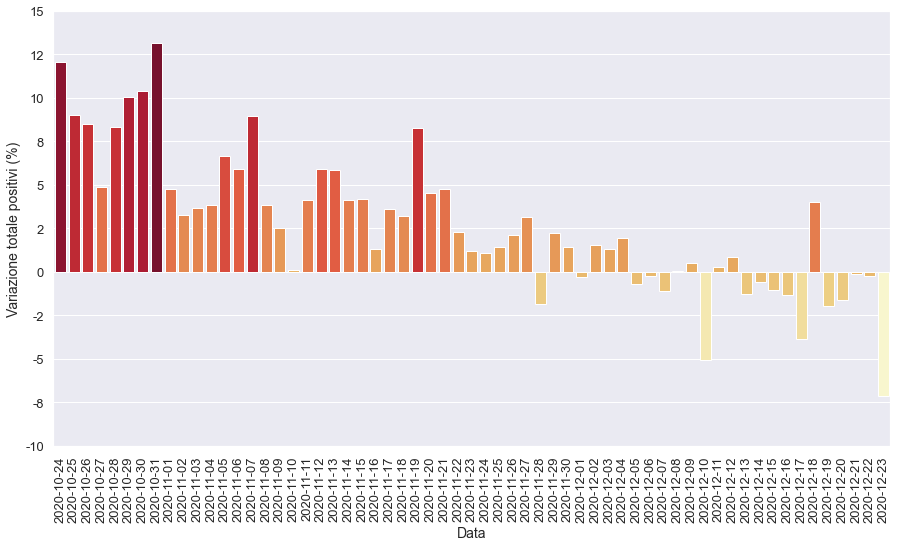

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

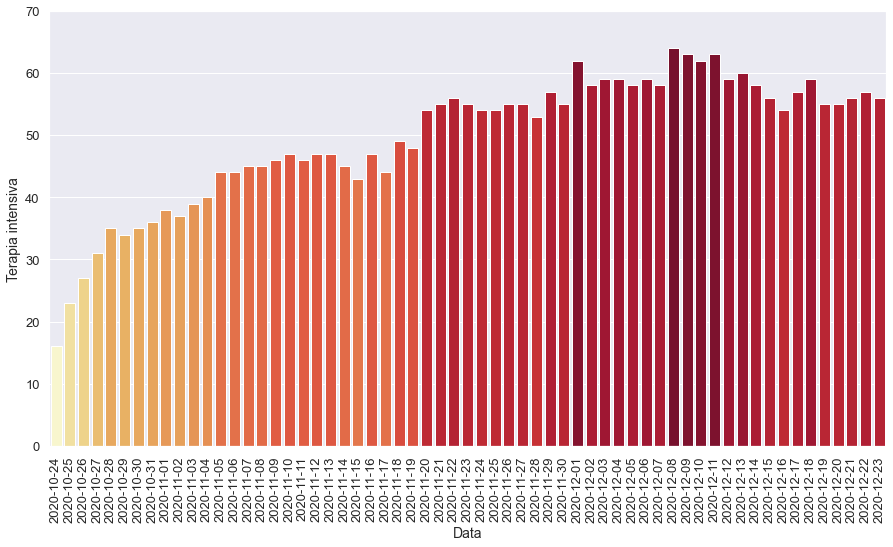

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

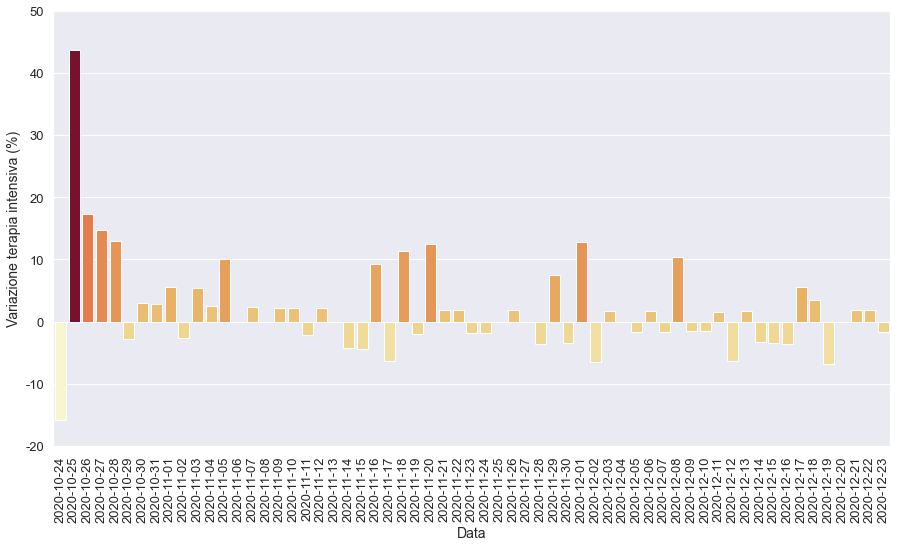

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

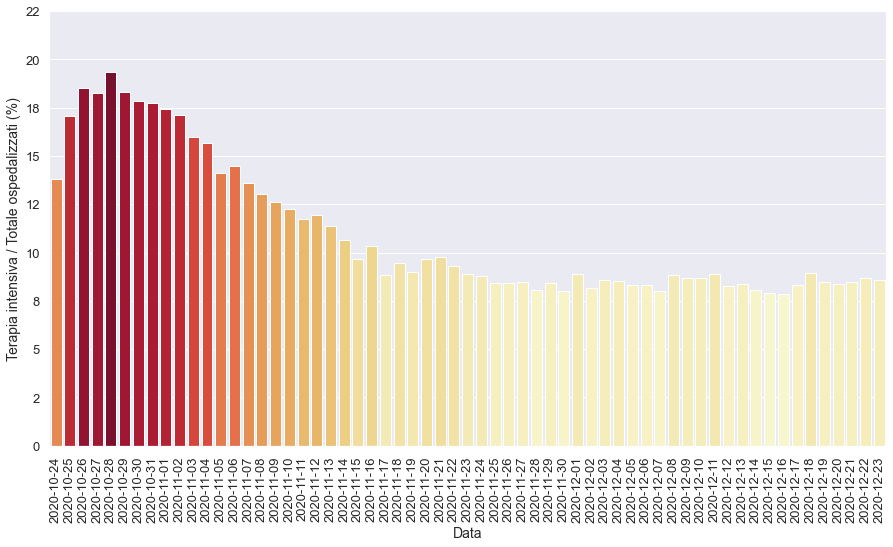

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

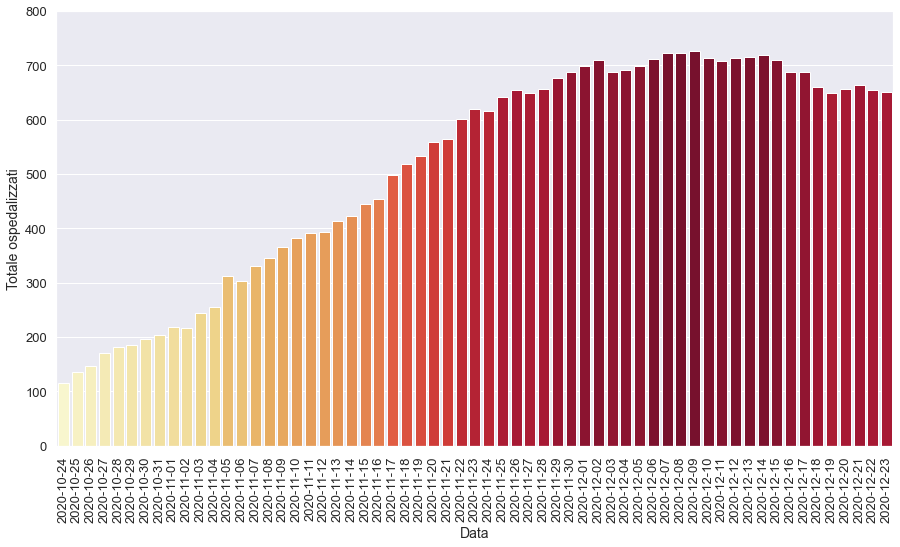

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

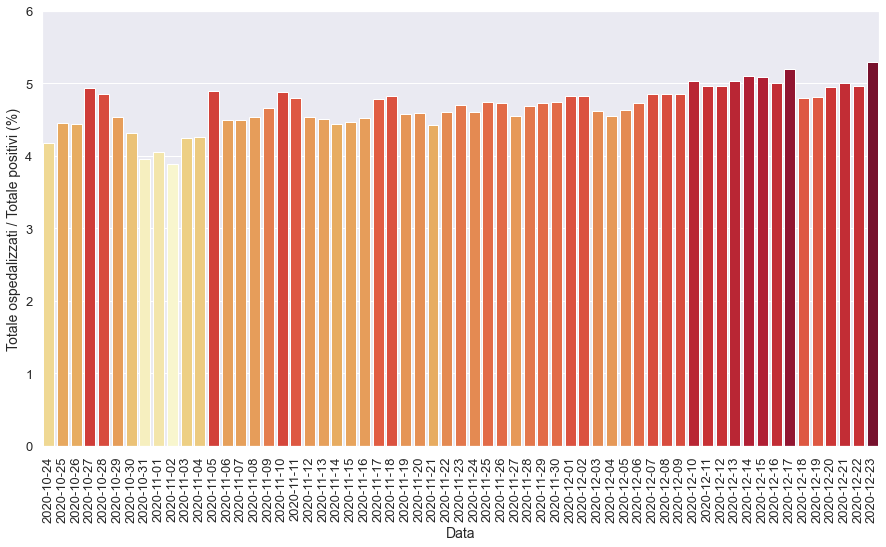

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

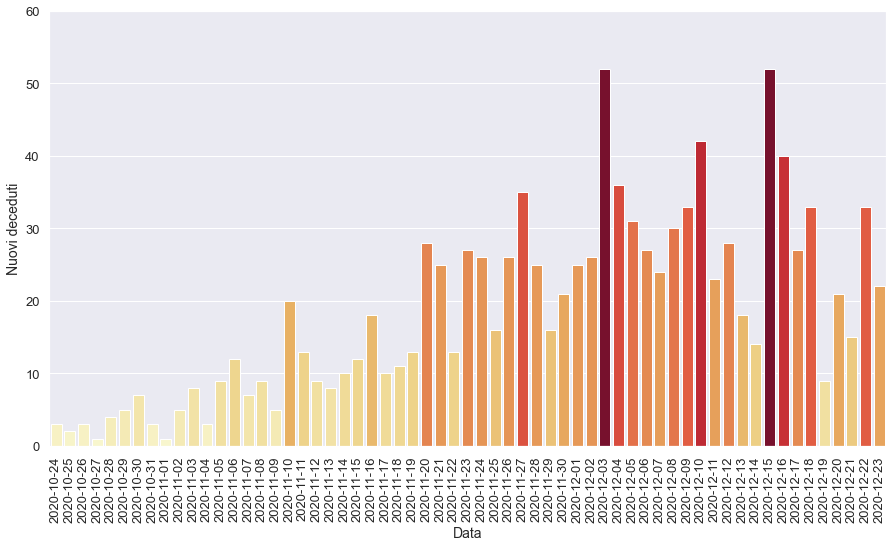

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

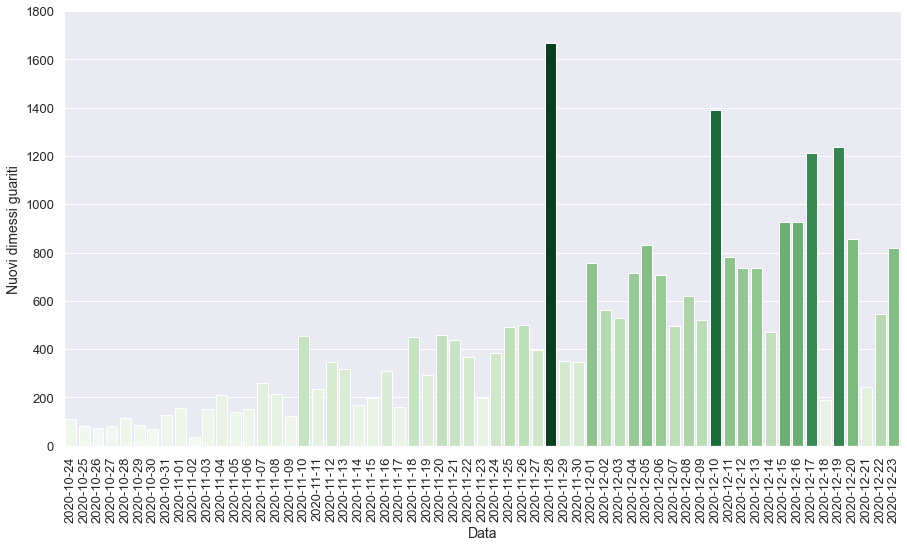

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-23T17:00:00,6,Friuli Venezia Giulia,565,55,620,12585,13205,154,377,...,27.0,2916.0,850.0,135.0,8.87,4.70,12.93,44.35,-1.79,1.18
1,2020-11-24T17:00:00,6,Friuli Venezia Giulia,561,54,615,12732,13347,142,554,...,26.0,5864.0,1244.0,147.0,8.78,4.61,9.45,44.53,-1.82,1.08
2,2020-11-25T17:00:00,6,Friuli Venezia Giulia,588,54,642,12894,13536,189,696,...,16.0,6910.0,1814.0,162.0,8.41,4.74,10.07,38.37,0.00,1.42
3,2020-11-26T17:00:00,6,Friuli Venezia Giulia,599,55,654,13168,13822,286,814,...,26.0,7626.0,1903.0,274.0,8.41,4.73,10.67,42.77,1.85,2.11
4,2020-11-27T17:00:00,6,Friuli Venezia Giulia,594,55,649,13606,14255,433,864,...,35.0,7284.0,1947.0,438.0,8.47,4.55,11.86,44.38,0.00,3.13
5,2020-11-28T17:00:00,6,Friuli Venezia Giulia,604,53,657,13339,13996,-259,1432,...,25.0,15001.0,6029.0,-267.0,8.07,4.69,9.55,23.75,-3.64,-1.82
6,2020-11-29T17:00:00,6,Friuli Venezia Giulia,620,57,677,13632,14309,313,680,...,16.0,3298.0,1336.0,293.0,8.42,4.73,20.62,50.90,7.55,2.24
7,2020-11-30T17:00:00,6,Friuli Venezia Giulia,633,55,688,13827,14515,206,575,...,21.0,6980.0,1636.0,195.0,7.99,4.74,8.24,35.15,-3.51,1.44
8,2020-12-01T17:00:00,6,Friuli Venezia Giulia,637,62,699,13769,14468,-47,736,...,25.0,6870.0,2346.0,-58.0,8.87,4.83,10.71,31.37,12.73,-0.32
9,2020-12-02T17:00:00,6,Friuli Venezia Giulia,652,58,710,13983,14693,225,812,...,26.0,7820.0,2100.0,214.0,8.17,4.83,10.38,38.67,-6.45,1.56


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

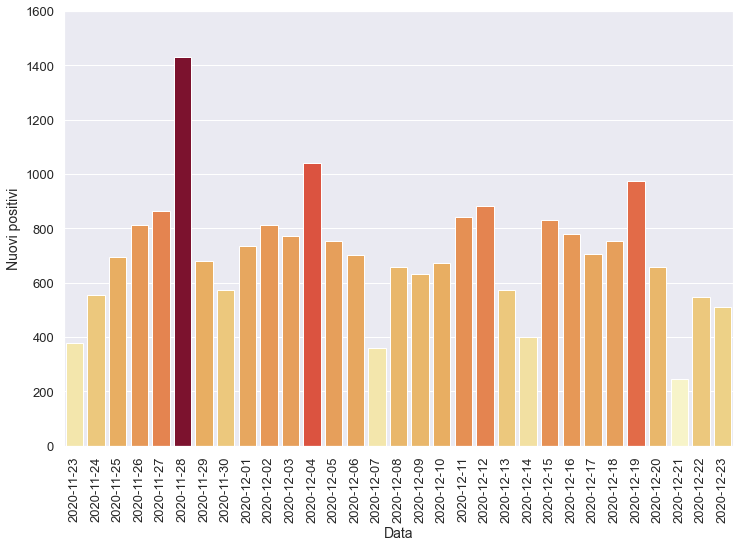

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

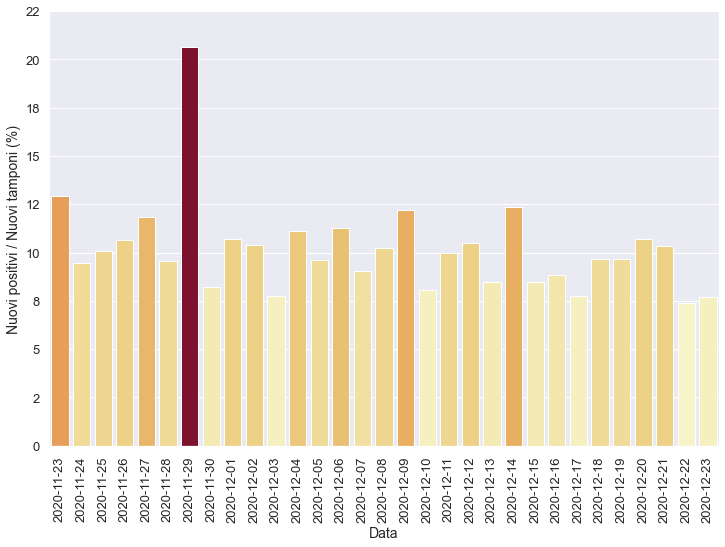

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

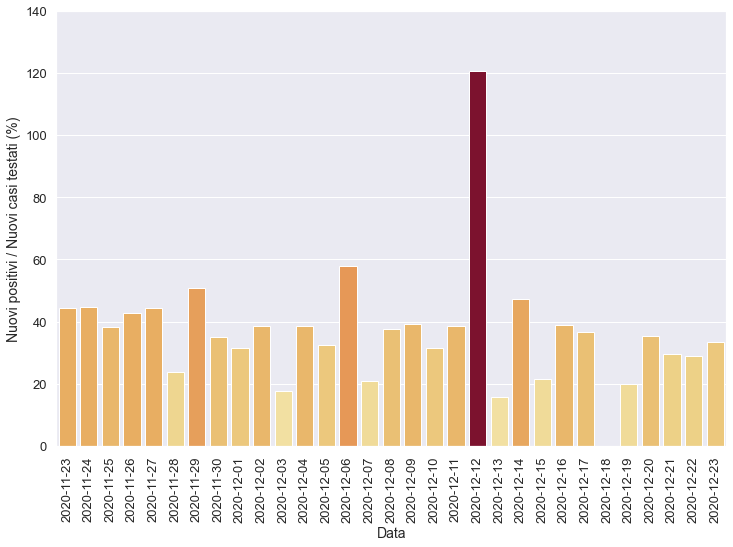

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

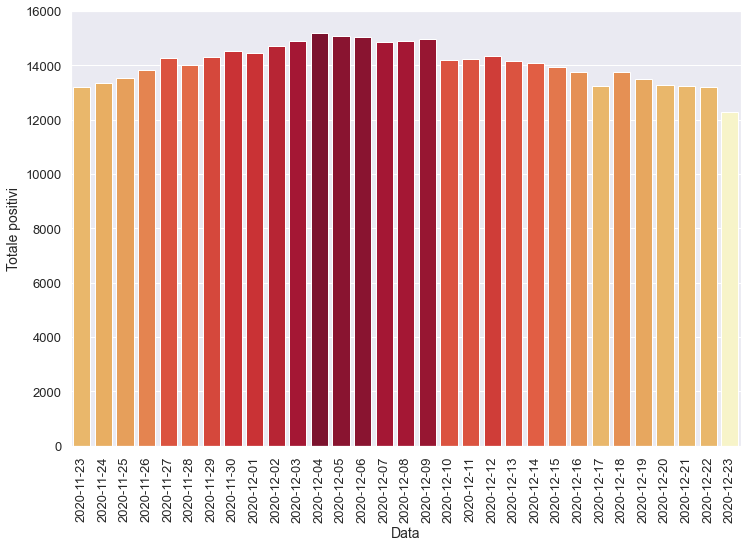

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

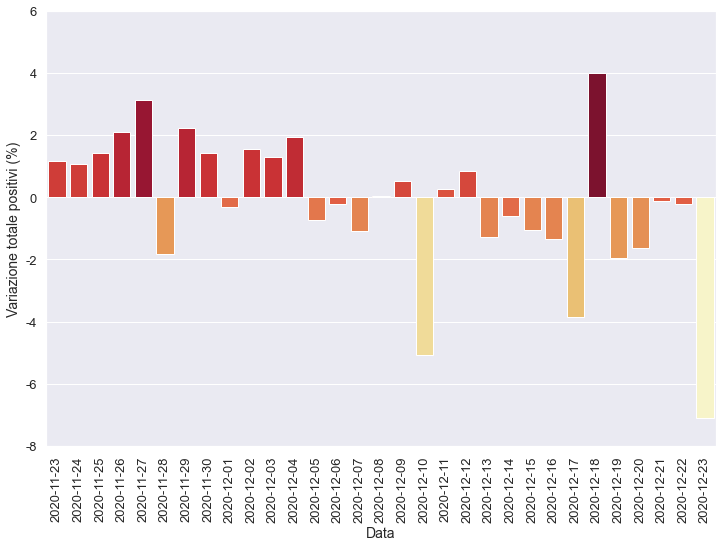

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

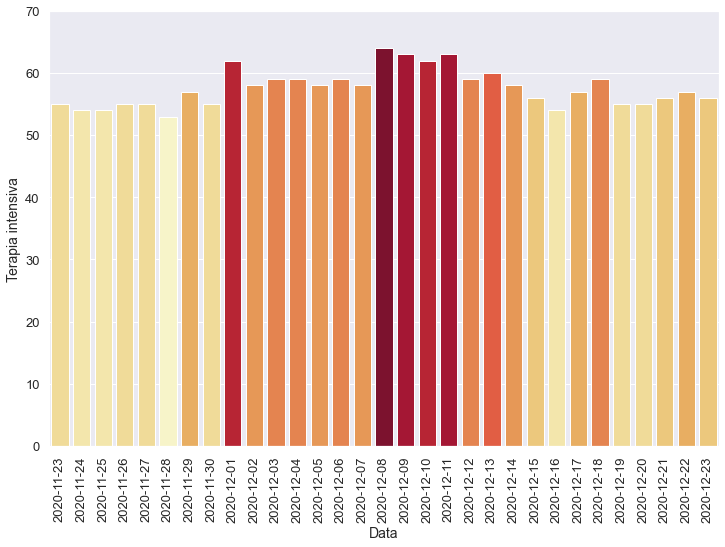

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

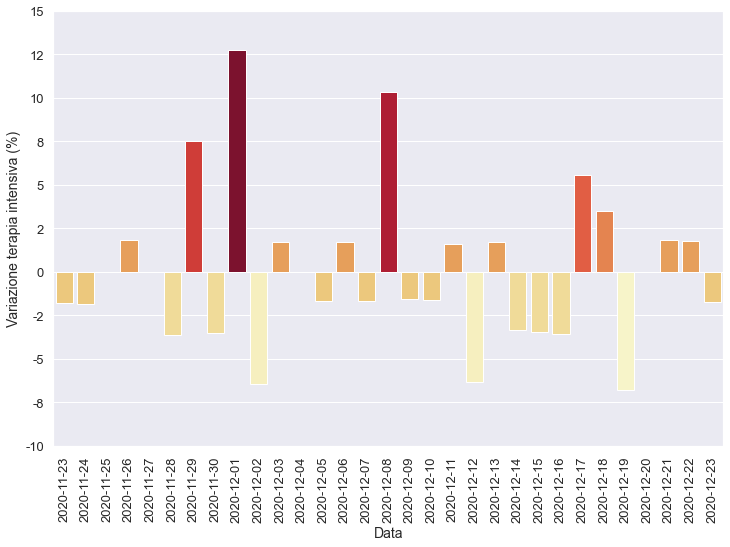

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

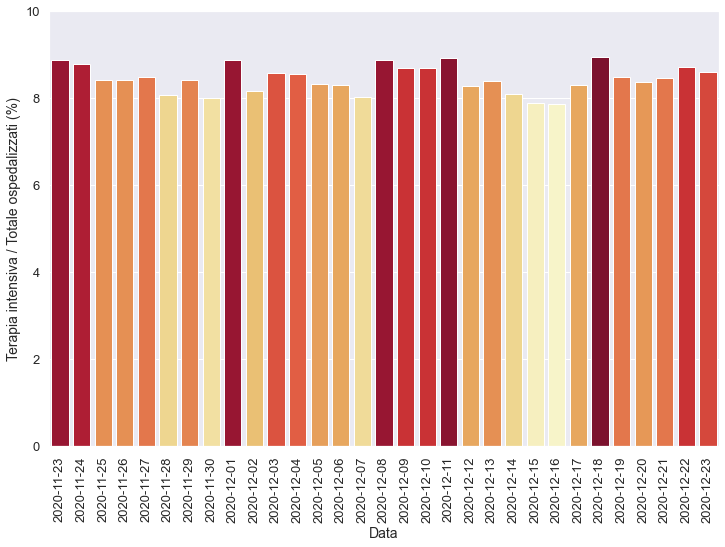

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

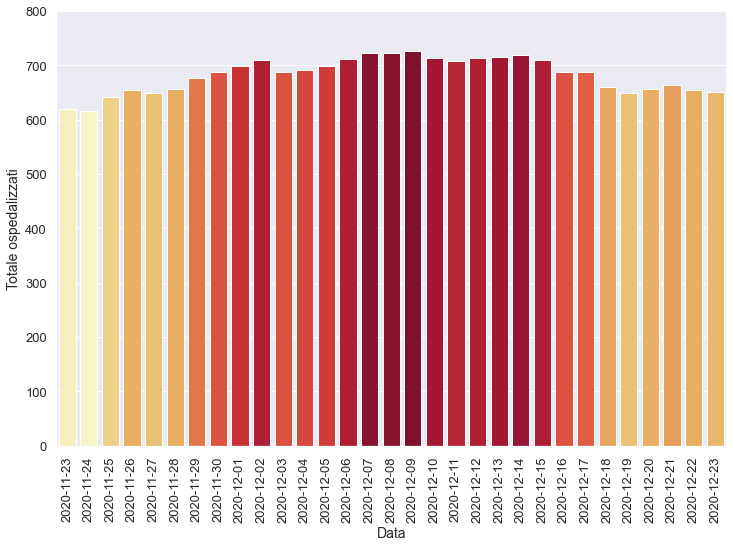

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

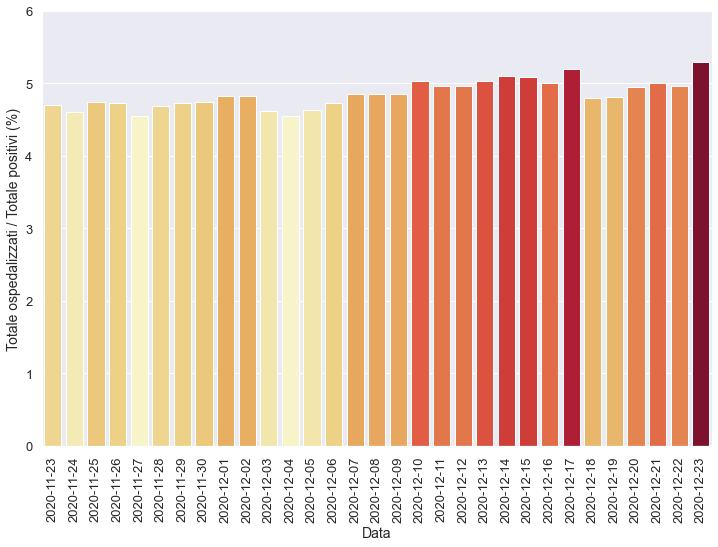

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

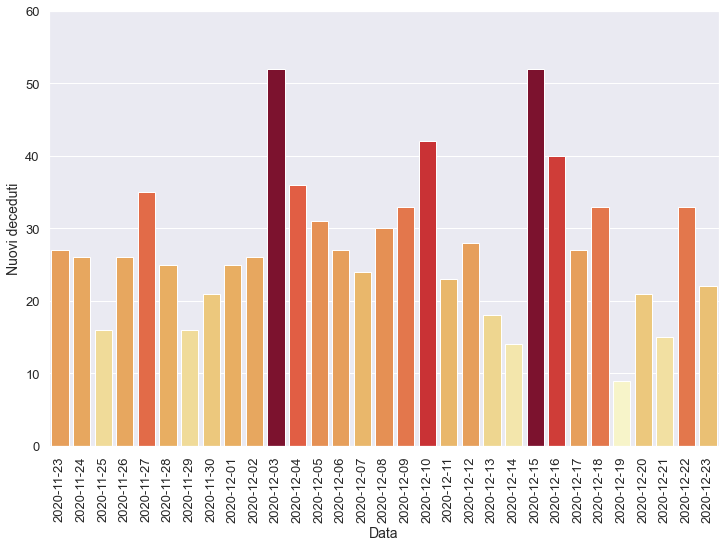

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

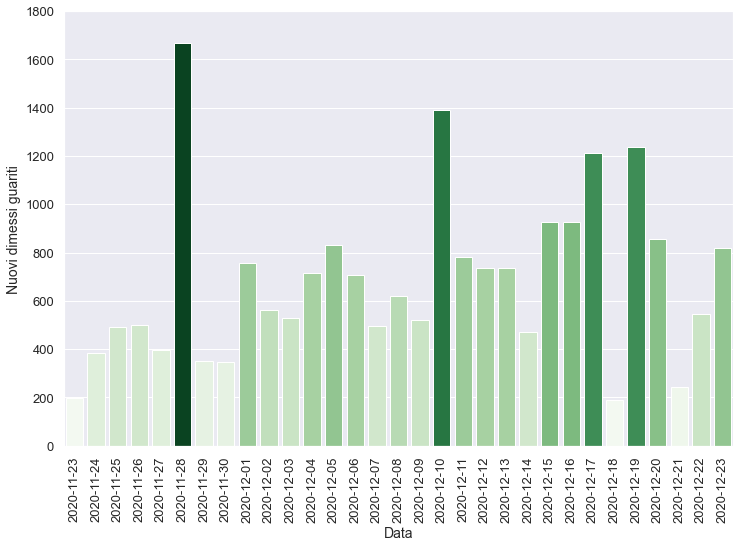

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-16T17:00:00,6,Friuli Venezia Giulia,634,54,688,13063,13751,-188,779,...,40.0,8826.0,2002.0,-166.0,7.85,5.00,8.83,38.91,-3.57,-1.35
1,2020-12-17T17:00:00,6,Friuli Venezia Giulia,630,57,687,12534,13221,-530,707,...,27.0,9096.0,1938.0,-529.0,8.30,5.20,7.77,36.48,5.56,-3.85
2,2020-12-18T17:00:00,6,Friuli Venezia Giulia,601,59,660,13091,13751,530,753,...,33.0,7781.0,0.0,557.0,8.94,4.80,9.68,0.00,3.51,4.01
3,2020-12-19T17:00:00,6,Friuli Venezia Giulia,594,55,649,12831,13480,-271,974,...,9.0,10096.0,4865.0,-260.0,8.47,4.81,9.65,20.02,-6.78,-1.97
4,2020-12-20T17:00:00,6,Friuli Venezia Giulia,602,55,657,12605,13262,-218,658,...,21.0,6148.0,1868.0,-226.0,8.37,4.95,10.70,35.22,0.00,-1.62
5,2020-12-21T17:00:00,6,Friuli Venezia Giulia,607,56,663,12584,13247,-15,244,...,15.0,2358.0,822.0,-21.0,8.45,5.00,10.35,29.68,1.82,-0.11
6,2020-12-22T17:00:00,6,Friuli Venezia Giulia,598,57,655,12561,13216,-31,549,...,33.0,7407.0,1897.0,-23.0,8.70,4.96,7.41,28.94,1.79,-0.23
7,2020-12-23T17:00:00,6,Friuli Venezia Giulia,595,56,651,11624,12275,-941,512,...,22.0,6648.0,1537.0,-937.0,8.60,5.30,7.70,33.31,-1.75,-7.12


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

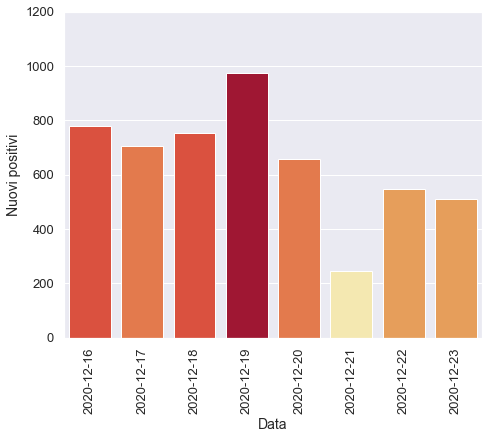

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

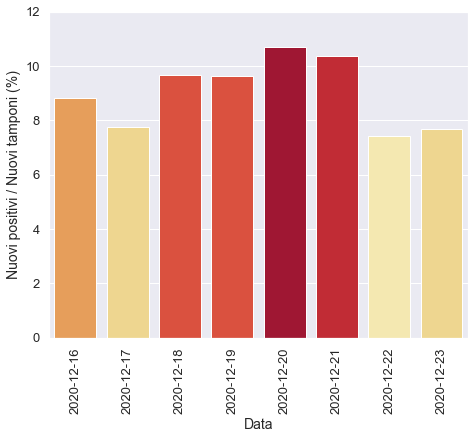

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

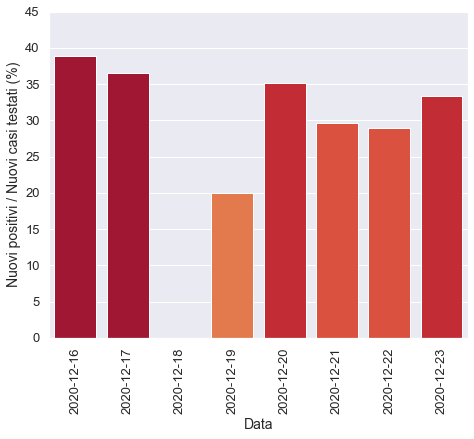

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

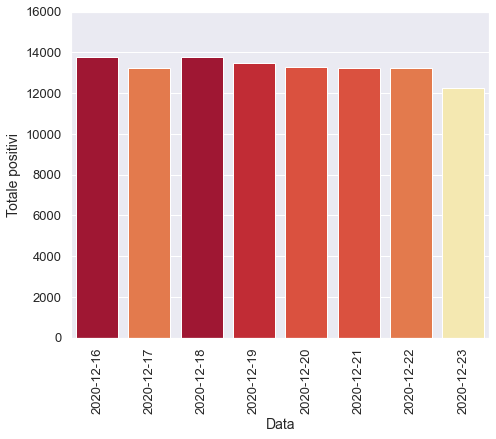

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

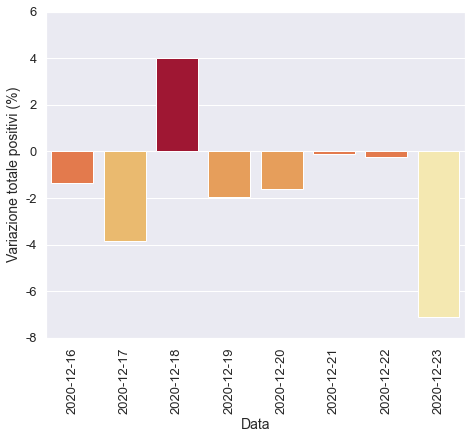

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

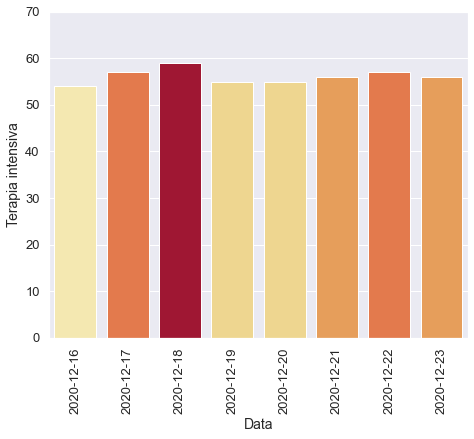

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

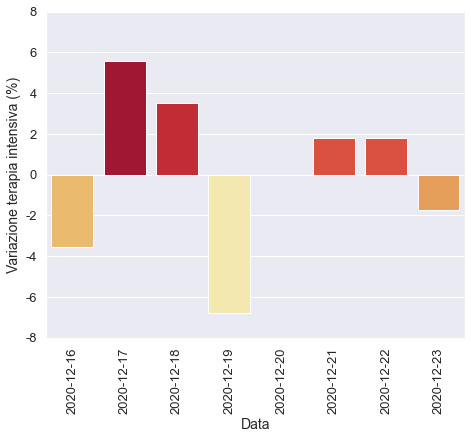

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

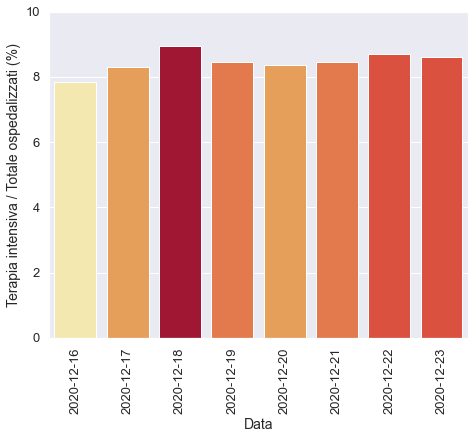

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

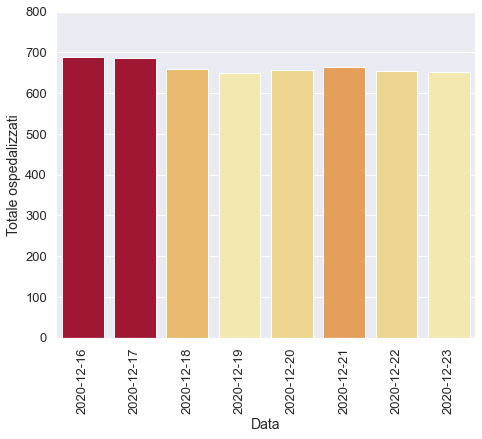

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

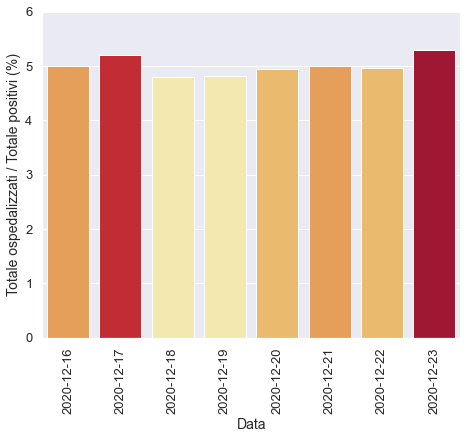

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

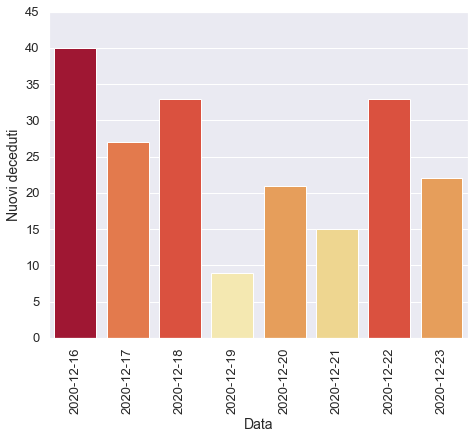

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

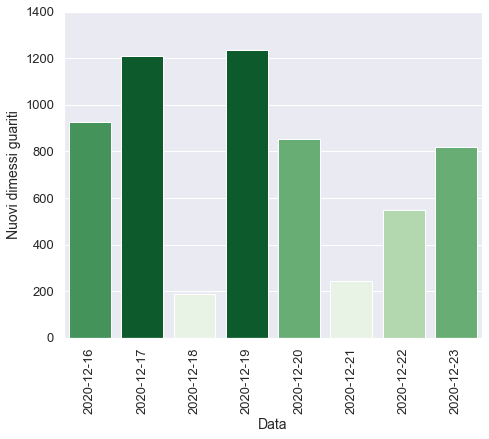

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)